In [17]:
from numpy import sinh, sqrt, fmin, tanh, linspace, logspace,array,pi
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [56]:
def sgw_disp(k):
    '''
    Given k, return omega for sgws
    '''
    omega = sqrt(g*k*tanh(k*H))
    return omega

def fgw_disp(k):
    '''
    Given k, return omega for fgws
    '''
    omega = sqrt((L*k**4 + rho*g)/(rho/tanh(k*H)/k + m))
    return omega

def sgw(omega):
    '''
    Given omega, calculate k for surface gravity waves
    '''
    if isinstance(omega,float):
        output = minimize (lambda x: abs(sgw_disp(x)-omega), omega/sqrt(g*H),
                          method=root_finding_algorithm )
        k = output.x
        good = output.success
#         return k, good
        return array(k)

    if len(omega)>0:
        k = []
        good = []
        for o in omega:
            output = minimize (lambda x: abs(sgw_disp(x)-o), o/sqrt(g*H),
                          method=root_finding_algorithm)
            k.append( output.x )
            good.append ( output.success )
#         return k, good
        return array(k)
    
def fgw(omega):
    '''
    Given omega, calculate k for flexural gravity waves
    '''
    if isinstance(omega,float):
        output = minimize (lambda x: abs(fgw_disp(x)-omega), omega/sqrt(g*H),
                          method=root_finding_algorithm)
        k = output.x
        good = output.success
#         return k, good
        return array(k)

    if len(omega)>0:
        k = []
        good = []
        for o in omega:
            output = minimize (lambda x: abs(fgw_disp(x)-o), o/sqrt(g*H),
                          method=root_finding_algorithm)
            k.append( output.x )
            good.append ( output.success )
#         return k, good
        return array(k)
    
def transmission_coeff(omega):
    
    k = sgw(omega)[0] # ocean  wavenumber
    # print(f'k={k}')
    # print(f'L={2*pi/k} in the water')
    kappa = fgw(omega)[0] # ice wavenumber
    # print(f'kappa={kappa}')
    # print(f'L={2*pi/kappa} in the ice')
    
    D = k*sinh(2*k*H) / kappa / sinh(2*kappa*H) * (
        2*kappa*H*(L*kappa**4 + rho*g-m*omega**2)+
        sinh(2*kappa*H)*(5*L*kappa**4 + rho*g - m*omega**2)
                                              )/\
        (rho*g*(2*k*H + sinh(2*k*H)))
    
    R_unscaled = 0.1
    T_unscaled = sqrt( (1 - R_unscaled**2)/D )
    R = R_unscaled / (R_unscaled + T_unscaled)
    T = T_unscaled / (R_unscaled + T_unscaled)
    return T

In [62]:
root_finding_algorithm = 'TNC'

omega = 2*pi / 20 # this is the independent variable
H = 400
hi = 300
E = 1e10
nu = 0.3
L = E/(1-nu**2) /15 * hi**3
# print(L)

rhoi = 910
m = rhoi*hi
rho = 1024
g = 9.81

print(f'Ocean wavelength at 30s period: {2*pi / sgw(2*pi/30)[0]:.2f}')
print(f'Ice Wavelength at 30s period: {2*pi / fgw(2*pi/30)[0]:.2f}')
print(f'Transmission_coefficient at 30s period: {transmission_coeff(2*pi/30):.2f}\n')

print(f'Ocean wavelength at 10s period: {2*pi / sgw(2*pi/10)[0]:.2f}')
print(f'Ice Wavelength at 10s period: {2*pi / fgw(2*pi/10)[0]:.2f}')
print(f'Transmission_coefficient at 10s period: {transmission_coeff(2*pi/10):.2f}\n')

Ocean wavelength at 30s period: 1340.58
Ice Wavelength at 30s period: 4610.04
Transmission_coefficient at 30s period: 0.48

Ocean wavelength at 10s period: 156.13
Ice Wavelength at 10s period: 3001.41
Transmission_coefficient at 10s period: 0.14



In [39]:
T=[]
omegs=logspace(-3,1,100)
for omeg in omegs:
    T.append(transmission_coeff(omeg))

/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in sinh
/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: overflow encountered in sinh
/home/bradlipovsky/anaconda3/envs/comcat/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in double_scalars


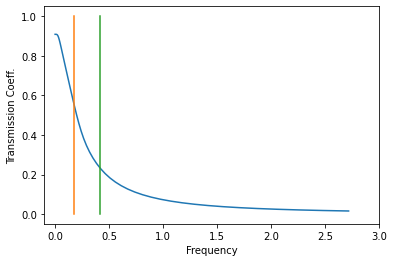

In [63]:
f1 = 2*pi/35
f2 = 2*pi/15

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(omegs,T)
plt.plot((f1,f1),(1e-3,1e0))
plt.plot((f2,f2),(1e-3,1e0))
plt.xlim([-0.1,3])
plt.xlabel('Frequency')
plt.ylabel('Transmission Coeff.')
plt.show()

In [66]:
T=[]
H_list=linspace(100,500,50)
for H in H_list:
    T.append(transmission_coeff(2*pi/10))
T

[0.10651696279234481,
 0.10820968403368701,
 0.10982590913799159,
 0.11136475458701124,
 0.11282769526131432,
 0.11421921456397266,
 0.11554326204513196,
 0.1168050325909005,
 0.1180089682887045,
 0.11915956366392878,
 0.12026112018359073,
 0.12131691593331062,
 0.12233031882507892,
 0.1233040602523998,
 0.12424060929927387,
 0.125143083599469,
 0.12601270098025777,
 0.12685177525497418,
 0.12766220641354525,
 0.12844540956156045,
 0.12920302153324975,
 0.12993575108958935,
 0.13064562793482576,
 0.1313330832718288,
 0.13199964604003583,
 0.13264612658608535,
 0.13327335230883045,
 0.13388220820554153,
 0.13447348367825596,
 0.13504786274106093,
 0.13560610037123177,
 0.13614845095595235,
 0.136675700383379,
 0.13718868194493444,
 0.137687649449658,
 0.13817314565601402,
 0.13864573649336817,
 0.13910569920752677,
 0.13955383186970363,
 0.13998975727390262,
 0.14041468734659435,
 0.14082875586288332,
 0.1412315675533426,
 0.1416244585455444,
 0.1420071410327359,
 0.14238040388165463,
 

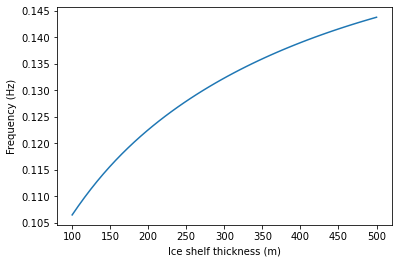

In [68]:
f1 = 2*pi/35
f2 = 2*pi/15

fig,ax=plt.subplots()
fig.patch.set_facecolor('w')
plt.plot(H_list,T)
# plt.plot((f1,f1),(1e-3,1e0))
# plt.plot((f2,f2),(1e-3,1e0))
# plt.xlim([-0.1,3])
plt.ylabel('Frequency (Hz)')
plt.xlabel('Ice shelf thickness (m)')
plt.show()

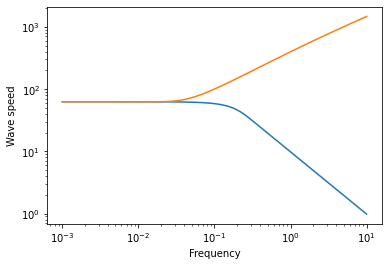

In [49]:
plt.subplots()
plt.loglog(omegs,omegs/sgw(omegs).flatten())
plt.loglog(omegs,omegs/fgw(omegs).flatten())
plt.xlabel('Frequency')
plt.ylabel('Wave speed')
plt.show()

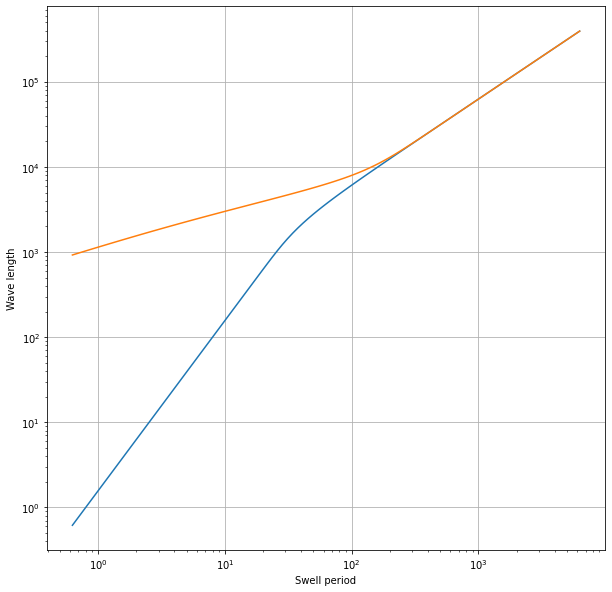

In [53]:
plt.subplots(figsize=(10,10))
plt.loglog(2*pi/omegs,2*pi/sgw(omegs).flatten())
plt.loglog(2*pi/omegs,2*pi/fgw(omegs).flatten())
plt.xlabel('Swell period')
plt.ylabel('Wave length')
plt.grid()
plt.show()